#### 定义问题

#### 收集数据和预处理

##### 收集数据

In [1]:
import pandas as pd

df_ads = pd.read_csv('ysxhwxrw.csv')
df_ads.head()  # 显示前几行数据

,点赞数,转发数,热度指数,文章评级,浏览量
0,2646,1347.0,7,5,260004
1,816,816.0,4,6,100004
2,1224,612.0,6,5,164502
3,1261,1261.0,6,6,163001
4,1720,1720.0,7,5,260401


##### 数据可视化

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/Users/admin/Workspace/DataDev/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Workspace/DataDev/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36190 (\N{CJK UNIFIED IDEOGRAPH-8D5E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Workspace/DataDev/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Workspace/DataDev/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27983 (\N{CJK UNIFIED IDEOGRA

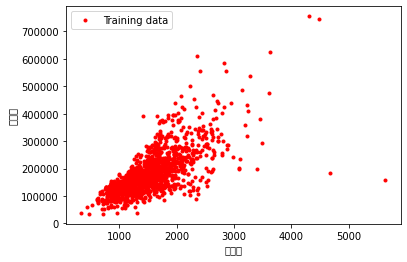

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(df_ads['点赞数'], df_ads['浏览量'], 'r.', label='Training data')
plt.xlabel('点赞数')  # x 轴 Label
plt.ylabel('浏览量')  # y 轴 Label
plt.legend()  # 显示图例
plt.rcParams['font.sans-serif'] =['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.show()  # 显示绘图结果

(-0.5, 9.5, 0.0, 800000.0)

/Users/admin/Workspace/DataDev/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28909 (\N{CJK UNIFIED IDEOGRAPH-70ED}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Workspace/DataDev/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Workspace/DataDev/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25351 (\N{CJK UNIFIED IDEOGRAPH-6307}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Workspace/DataDev/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/Workspace/DataDev/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWar

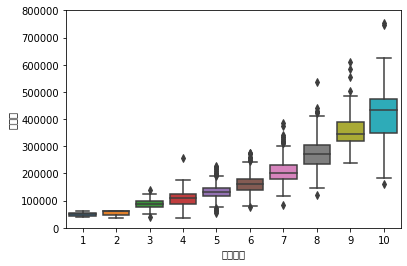

In [3]:
data = pd.concat([df_ads['浏览量'], df_ads['热度指数']], axis=1)
fig = sns.boxplot(x='热度指数', y='浏览量', data=data)  # 用 seaborn 箱线图画图
fig.axis(ymin=0, ymax=800000)  # 设定 y z轴坐标

##### 数据清洗
* 第一种是处理缺失的数据
* 第二个是处理重复的数据
* 第三个是处理错误的数据
* 第四个是处理不可用的数据

In [4]:
df_ads.isna().sum()  # NaN 出现的次数

点赞数      0
转发数     37
热度指数     0
文章评级     0
浏览量      0
dtype: int64

In [5]:
df_ads = df_ads.dropna()  # 把出现 NaN 的数据行删掉
df_ads

,点赞数,转发数,热度指数,文章评级,浏览量
0,2646,1347.0,7,5,260004
1,816,816.0,4,6,100004
2,1224,612.0,6,5,164502
3,1261,1261.0,6,6,163001
4,1720,1720.0,7,5,260401
...,...,...,...,...,...
1455,1121,1121.0,4,5,140001
1456,1657,1657.0,6,3,163503
1457,1652,1600.0,8,5,392501
1458,1096,1096.0,5,5,138805


##### 特征工程

##### 构建特征集和标签集

In [6]:
X = df_ads.drop(['浏览量'], axis=1)  # 特征集、Drop 掉标签相关字段
y = df_ads.浏览量  # 标签集

In [7]:
X.head()

,点赞数,转发数,热度指数,文章评级
0,2646,1347.0,7,5
1,816,816.0,4,6
2,1224,612.0,6,5
3,1261,1261.0,6,6
4,1720,1720.0,7,5


In [8]:
y.head()

0    260004
1    100004
2    164502
3    163001
4    260401
Name: 浏览量, dtype: int64

##### 拆分训练集、验证集和测试集
* 特征训练集（X_train）
* 特征测试集（X_test）
* 标签训练集（y_train）
* 标签测试集（y_test）

In [9]:
# 将数据集进行 80%（训练集）和 20%（验证集）的分割
from sklearn.model_selection import train_test_split

X_trian, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### 选择算法和确定模型
```
IF 样本 <= 50: 数据样本太少 -> 获取更多数据
ELSE 样本 > 50:
  IF 是分类问题:
    IF 数据有标签:
      IF 数据量 >= 10W: 选择 SGD 分类器
      ELSE:
        先尝试线性 SVM 分类器 -> 不好用、再继续尝试其他算法
        IF 特征为文本: 选择朴素贝叶斯 SVM
        ELSE: 先尝试 KNN -> 不好用、尝试 SVM 加集成方法
    ELSE 数据没有标签: 选择各种聚类算法
  ELSE 不是分类问题:
    IF 需要预测数值：回归问题
      IF 数据量 >= 10W: 选择 SGD 线性回归
      ELSE: 根据数据集特征选择 Lasso 回归、Ridge 回归等
    ELSE:
      IF 进行可视化: 考虑几种降维方法
      ELSE 预测结构（结构化输出）: Sklearn 帮不了你
```

In [10]:
from sklearn.linear_model import LinearRegression  # 导入线性回归算法模型

linereg_model = LinearRegression()  # 使用线性回归算法创建模型

#### 训练拟合模型

In [11]:
linereg_model.fit(X_trian, y_train)  # 用训练集数据训练机器、拟合函数、确定内部参数

LinearRegression()

#### 评估并优化模型性能
* 在验证集上预测
* 评估预测结果
* 结果还不够好
* 调整模型参数或更换模型
* 新参数或新模型

In [12]:
y_pred = linereg_model.predict(X_test)  # 预测测试集的 y 值

In [13]:
df_ads_pred = X_test.copy()  # 测试集特征数据
df_ads_pred['浏览量真值'] = y_test  # 测试集标签真值
df_ads_pred['浏览量预测值'] = y_pred  # 测试集标签预测值
df_ads_pred

,点赞数,转发数,热度指数,文章评级,浏览量真值,浏览量预测值
1074,1709,970.0,6,5,130003,181499.180492
404,1440,1440.0,4,4,118005,122478.101604
1375,1434,1454.0,7,5,189003,214815.847941
1317,832,832.0,6,6,105504,137486.350468
145,923,876.0,5,5,119501,110710.382414
...,...,...,...,...,...,...
420,1790,873.0,7,5,193004,211755.243385
1338,2622,1463.0,8,5,325002,301982.291922
542,1342,1372.0,6,5,161502,177814.080182
311,1663,1364.0,4,6,256002,136460.539585


In [14]:
print('当前模型的 4 个特征的权重分别是：', linereg_model.coef_)
print('当前模型的截距（偏置）是：', linereg_model.intercept_)

当前模型的 4 个特征的权重分别是： [   48.08395224    34.73062229 29730.13312489  2949.62196343]
当前模型的截距（偏置）是： -127493.90606857178


In [15]:
print('线性回归预测评分：', linereg_model.score(X_test, y_test))  # 评估模型

线性回归预测评分： 0.740552064611524
